In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams.update({"font.size": 12})
%matplotlib inline

In [ ]:
!pip3 install flair

     |████████████████████████████████| 322 kB 14.1 MB/s 
     |████████████████████████████████| 3.4 MB 60.3 MB/s 
     |████████████████████████████████| 64 kB 2.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.7 MB 342 kB/s 
     |████████████████████████████████| 48 kB 4.3 MB/s 
     |████████████████████████████████| 61 kB 394 kB/s 
     |████████████████████████████████| 788 kB 65.5 MB/s 
     |████████████████████████████████| 981 kB 53.8 MB/s 
     |████████████████████████████████| 1.2 MB 64.7 MB/s 
     |████████████████████████████████| 62 kB 718 kB/s 
     |████████████████████████████████| 895 kB 71.5 MB/s 
     |████████████████████████████████| 3.3 MB 57.5 MB/s 
     |████████████████████████████████| 596 kB 68.3 MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9704 sha256=f97ce94e097d95981e09bae24f9a42e6c9d2d915d61ff

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


    - Are there differences between "old" users (pre-2021) and new ones?
    - Are there clusters of users? 
    - Create corpora and embeddings for users based on text submitted by them, upvotes etc.
    - Can we identify those that have posted (successful) DDs? 
    - Can we rank the users according to their expertise?
    - Are the same users active in the other reviewed subreddits? 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/WSB/WSB_top_users_features.csv", sep=";")
#df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')
#df.index = pd.DatetimeIndex(df.created_utc)
df.tail()

,author,id,title,selftext,date,day,month,year,tickers_,tickers_count_,link_flair_text,comments_mean,comments_sum,score_mean,score_sum,upvote_ratio_mean,upvote_ratio_sum,flairs,flairs_count,title_polarity,title_subjectivity,body_polarity,body_subjectivity,title_tokens,selftext_tokens,polarity
7248,zog30,22,IT FINALLY ARRIVED WHY CANT YOU FIND GME ON CO...,https://...,2021-10-04 2021-10-04 2021-10-04 2021-10-04 20...,4 4 4 4 4 4 4 23 16 9 29 21 21 21 1 31 30 30 2...,10 10 10 10 10 10 10 9 9 7 6 2 2 2 2 1 1 1 1 1...,2021 2021 2021 2021 2021 2021 2021 2021 2021 2...,NaN,{},YOLO Meme Discussion News Meme Meme Discussion...,2.181818,48,1.045455,23,1.000000,22.00,"['YOLO', 'Meme', 'Discussion', 'News', 'Meme',...","{'YOLO': 4, 'Meme': 4, 'Discussion': 10, 'News...",0.092562,0.677479,0.121429,0.485714,"['IT', 'FINALLY', 'ARRIVED', 'WHY', 'CANT', 'Y...","[' ', 'ht...",0.213991
7249,zoomer296,11,IRS be like: Suction Cup GME Actual footage of...,...my plasma so I can buy ...,2021-06-26 2021-02-26 2021-01-31 2021-01-29 20...,26 26 31 29 28 15 7 4 1 28 27,6 2 1 1 1 1 12 12 12 11 11,2021 2021 2021 2021 2021 2021 2020 2020 2020 2...,NaN,{},Meme Meme Meme Discussion Meme Meme Shitpost ...,11.454545,126,11.454545,126,0.963636,10.60,"['Meme', 'Meme', 'Meme', 'Discussion', 'Meme',...","{'Meme': 5, 'Discussion': 1, '': 3, 'Shitpost'...",-0.090930,0.470181,0.500000,0.500000,"['IRS', 'be', 'like', ':', 'Suction', 'Cup', '...","[' ', '...', 'my', 'plasma'...",0.409070
7250,zsd99,19,J Powell and the Quantitative Easing Infinity ...,"Mr and Mrs Powell, of 1850 K Street, Washingto...",2020-03-24 2020-03-23 2020-03-10 2020-03-09 20...,24 23 10 9 29 27 25 24 22 19 18 17 14 5 2 27 1...,3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 1 12 12 12,2020 2020 2020 2020 2020 2020 2020 2020 2020 2...,NaN,{},Shitpost Discussion Shitpost Fundamentals Disc...,70.052632,1331,1.000000,19,0.000000,0.00,"['Shitpost', 'Discussion', 'Shitpost', 'Fundam...","{'Shitpost': 2, 'Discussion': 2, 'Fundamentals...",0.046011,0.241466,0.031163,0.403703,"['J', 'Powell', 'and', 'the', 'Quantitative', ...","['Mr', 'and', 'Mrs', 'Powell', ',', 'of', '185...",0.077174
7251,zulufux999,11,GME moon landing Remember who we are and why w...,"Alright amigos, I did some mathematical fucker...",2021-07-19 2021-07-17 2021-07-15 2021-07-14 20...,19 17 15 14 7 2 18 25 21 19 12,7 7 7 7 7 3 2 1 1 1 5,2021 2021 2021 2021 2021 2021 2021 2021 2021 2...,NaN,{},DD Meme Discussion Discussion Discussion Gain ...,4.454545,49,1.909091,21,0.979091,10.77,"['DD', 'Meme', 'Discussion', 'Discussion', 'Di...","{'DD': 1, 'Meme': 1, 'Discussion': 5, 'Gain': ...",0.150000,0.500000,0.102381,0.428075,"['GME', 'moon', 'landing', 'Remember', 'who', ...","['Alright', 'amigos', ',', 'I', 'did', 'some',...",0.252381
7252,zxc123zxc123,12,Is WSB hiding the scale of financial crisis? +...,There’s a bubble they’d like us to think WE ca...,2021-10-13 2021-06-04 2021-06-04 2021-06-04 20...,13 4 4 4 29 22 19 19 7 29 23 23,10 6 6 6 4 1 1 1 1 12 12 12,2021 2021 2021 2021 2021 2021 2021 2021 2021 2...,NaN,{},Meme Gain Meme Gain News Meme Meme Meme Discus...,9.000000,108,2.083333,25,0.980833,11.77,"['Meme', 'Gain', 'Meme', 'Gain', 'News', 'Meme...","{'Meme': 6, 'Gain': 2, 'News': 1, 'Discussion'...",0.515000,0.590000,-0.227381,0.561012,"['Is', 'WSB', 'hiding', 'the', 'scale', 'of', ...","['There', '’s', 'a', 'bubble', 'they', '’d', '...",0.287619


# Embedding of titles by user

In [ ]:
from flair.embeddings import WordEmbeddings, DocumentPoolEmbeddings

# initialize the word embeddings
glove_embedding = WordEmbeddings('glove')

# initialize the document embeddings, mode = mean
document_embeddings = DocumentPoolEmbeddings([glove_embedding])

2021-12-26 11:35:17,724 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmpmzzylfs0


100%|██████████| 160000128/160000128 [00:04<00:00, 37764663.71B/s]

2021-12-26 11:35:22,037 copying /tmp/tmpmzzylfs0 to cache at /root/.flair/embeddings/glove.gensim.vectors.npy


2021-12-26 11:35:22,264 removing temp file /tmp/tmpmzzylfs0
2021-12-26 11:35:22,387 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim not found in cache, downloading to /tmp/tmp63bhb493


100%|██████████| 21494764/21494764 [00:00<00:00, 36754673.19B/s]

2021-12-26 11:35:23,047 copying /tmp/tmp63bhb493 to cache at /root/.flair/embeddings/glove.gensim


2021-12-26 11:35:23,074 removing temp file /tmp/tmp63bhb493


In [ ]:
from flair.data import Sentence
# create an example sentence
sentence = Sentence('GME moon landing Remember who we are and why we started. We just like the stock! 300% maintenance fee? *sniff* is that someone’s ass on fire? Full Moon Phase July 17-31, peaking in July 24! Could GME be the catalyst? Before and after becoming a 💎🤲🐒🚀🌖 They’re making this about PFOF and it’s not. Hold The Line To whoever did the DD on INTC a little while ago- thank you 💎🤲🚀 Shitron Waging Propaganda War to scare people into selling. Hold the line 💎 🤲 Whoever called the Logitech earnings')

# embed the sentence with our document embedding
document_embeddings.embed(sentence)

# now check out the embedded sentence.
print(sentence.embedding)

tensor([-5.1453e-02,  1.7997e-01,  3.0566e-01, -2.5891e-01, -6.5122e-02,
         7.7548e-02, -3.0130e-02,  1.7006e-01, -1.7178e-02, -3.0174e-02,
         2.4421e-01, -4.6930e-03,  1.8020e-01,  7.5279e-02,  1.8211e-01,
        -2.5435e-01,  9.9035e-02,  8.9649e-02, -3.0217e-01,  1.4850e-01,
         2.8007e-01, -1.1571e-02,  1.4977e-01,  5.9428e-02,  1.8182e-01,
         6.3117e-02, -1.3883e-01, -2.7962e-01,  1.3162e-01, -1.6552e-01,
        -7.9298e-02,  4.5218e-01,  1.4725e-02,  4.7907e-02,  4.2890e-04,
         1.8077e-01,  1.5429e-02,  1.4745e-01,  7.3660e-02, -1.9420e-01,
        -2.6864e-01, -1.2554e-01,  7.6793e-02, -2.9150e-01, -6.6028e-02,
        -6.9010e-02,  1.0458e-01, -3.4608e-01, -6.1014e-02, -6.8816e-01,
        -4.4280e-02, -5.6526e-02,  1.0164e-01,  8.8989e-01, -3.1960e-01,
        -1.9407e+00,  1.9059e-02, -1.0006e-01,  1.3296e+00,  3.5041e-01,
        -1.3846e-01,  6.0713e-01, -2.5689e-01,  5.8743e-02,  6.0024e-01,
         8.2746e-02,  2.9207e-01,  2.2960e-01,  1.2

In [ ]:
def get_sentence_emb(text):
  sentence = Sentence(text)
  document_embeddings.embed(sentence)
  return sentence.embedding


In [ ]:
df.head(1)

,author,id,title,selftext,date,day,month,year,tickers_,tickers_count_,link_flair_text,comments_mean,comments_sum,score_mean,score_sum,upvote_ratio_mean,upvote_ratio_sum,flairs,flairs_count,title_polarity,title_subjectivity,body_polarity,body_subjectivity,title_tokens,selftext_tokens,polarity
0,-A-Brocoma2021,14,"Strength of a silverback gorilla, dominance of...",What if everyone did? Bought just one more s...,2021-04-03 2021-03-28 2021-03-16 2021-03-16 20...,3 28 16 16 10 10 10 27 26 25 25 23 20 2,4 3 3 3 3 3 3 2 2 2 2 2 2 2,2021 2021 2021 2021 2021 2021 2021 2021 2021 2...,['GME'],{'GME': 1},Meme Discussion Meme YOLO Technical Analysis G...,5.428571,76,19.285714,270,0.972857,13.62,"['Meme', 'Discussion', 'Meme', 'YOLO', 'Techni...","{'Meme': 2, 'Discussion': 2, 'YOLO': 8, 'Techn...",0.22166,0.507253,0.25,0.25,"['Strength', 'of', 'a', 'silverback', 'gorilla...","[' ', 'What', 'if', 'everyone', 'did', '?', '...",0.47166


In [ ]:
df['title_emb'] = df['title'].apply(lambda x: get_sentence_emb(x))

In [ ]:
df.head(2)

,author,id,title,selftext,date,day,month,year,tickers_,tickers_count_,link_flair_text,comments_mean,comments_sum,score_mean,score_sum,upvote_ratio_mean,upvote_ratio_sum,flairs,flairs_count,title_polarity,title_subjectivity,body_polarity,body_subjectivity,title_tokens,selftext_tokens,polarity,title_emb
0,-A-Brocoma2021,14,"Strength of a silverback gorilla, dominance of...",What if everyone did? Bought just one more s...,2021-04-03 2021-03-28 2021-03-16 2021-03-16 20...,3 28 16 16 10 10 10 27 26 25 25 23 20 2,4 3 3 3 3 3 3 2 2 2 2 2 2 2,2021 2021 2021 2021 2021 2021 2021 2021 2021 2...,['GME'],{'GME': 1},Meme Discussion Meme YOLO Technical Analysis G...,5.428571,76,19.285714,270,0.972857,13.62,"['Meme', 'Discussion', 'Meme', 'YOLO', 'Techni...","{'Meme': 2, 'Discussion': 2, 'YOLO': 8, 'Techn...",0.221660,0.507253,0.25000,0.250000,"['Strength', 'of', 'a', 'silverback', 'gorilla...","[' ', 'What', 'if', 'everyone', 'did', '?', '...",0.471660,"[tensor(0.0226), tensor(0.2074), tensor(0.3645..."
1,-DFH-,15,The media is now quoting posts from “wallstree...,"Make it happen, mods Clothing re...",2021-01-28 2021-01-28 2021-01-27 2021-01-27 20...,28 28 27 27 25 8 2 24 18 15 12 11 11 6 6,1 1 1 1 8 6 6 4 3 3 3 3 3 3 3,2021 2021 2021 2021 2020 2020 2020 2020 2020 2...,"['SPG', 'BYND', 'MCD', 'GIS']","{'SPG': 1, 'BYND': 1, 'MCD': 1, 'GIS': 1}",News Meme Meme Discussion Shitpost Gain Techni...,9.066667,136,1.800000,27,0.448667,6.73,"['News', 'Meme', 'Meme', 'Discussion', 'Shitpo...","{'News': 1, 'Meme': 2, 'Discussion': 3, 'Shitp...",0.191852,0.466481,0.05741,0.504969,"['The', 'media', 'is', 'now', 'quoting', 'post...","[' ', 'Make', 'it', 'happen', ',', 'mods'...",0.249262,"[tensor(-0.0433), tensor(0.2317), tensor(0.290..."


In [ ]:
df['title_emb'][0].size()

torch.Size([100])

## Visualize Embeddings for clustering

In [ ]:
all_users = []
all_users_emb = []
for index, row in df.iterrows():
     #print(row["author"], row["title_emb"])
     all_users.append(row["author"])
     all_users_emb.append(row["title_emb"].numpy())


In [ ]:
from sklearn.manifold import TSNE
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


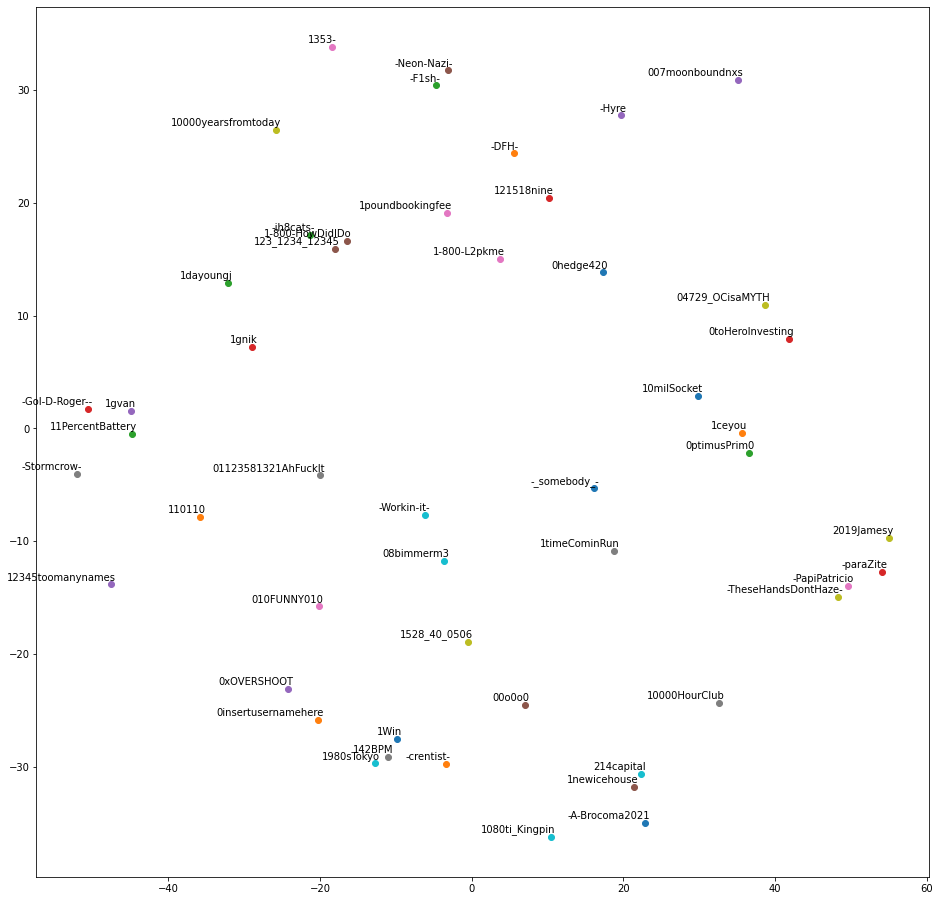

In [ ]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(all_users_emb)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
        
plt.figure(figsize=(16, 16)) 
for i in range(len(x[0:50])):
    plt.scatter(x[i],y[i])
    plt.annotate(all_users[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
plt.show()

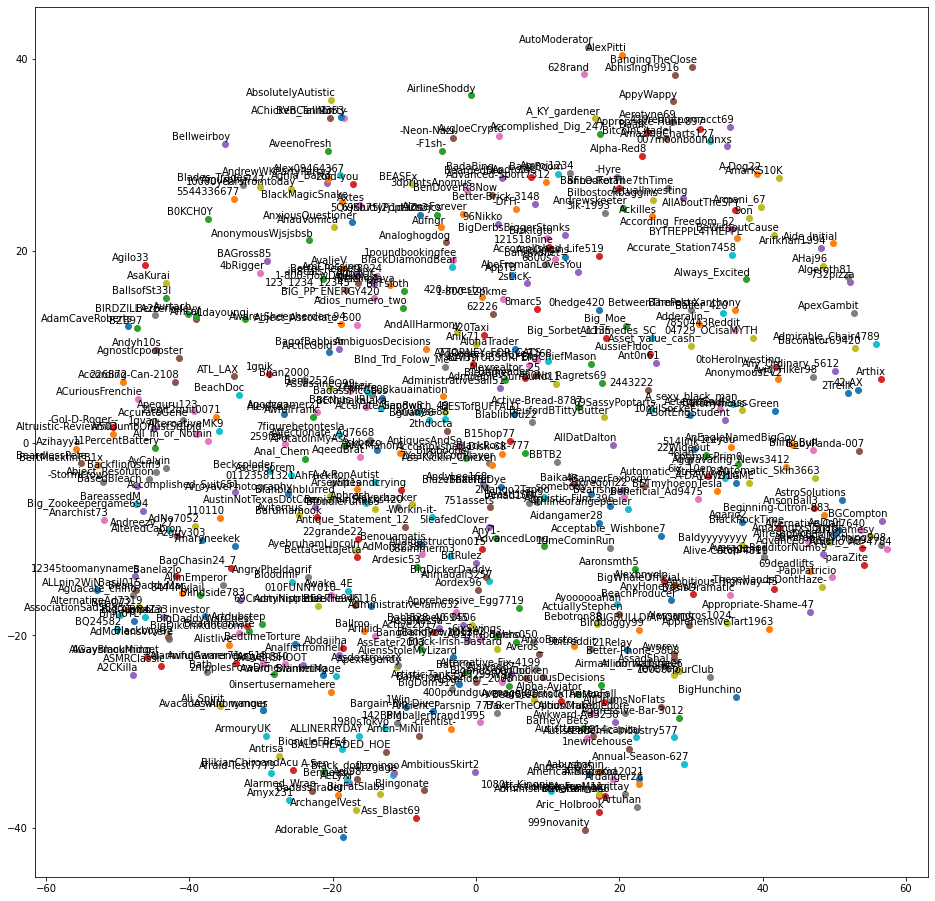

In [ ]:
plt.figure(figsize=(16, 16)) 
for i in range(len(x[0:500])):
    plt.scatter(x[i],y[i])
    plt.annotate(all_users[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
plt.show()

In [ ]:
## compare two users of same cluster 
user1 = 'Aric_Holbrook'
user2 = '999novanity'
df[df['author'] == user1]

,author,id,title,selftext,date,day,month,year,tickers_,tickers_count_,link_flair_text,comments_mean,comments_sum,score_mean,score_sum,upvote_ratio_mean,upvote_ratio_sum,flairs,flairs_count,title_polarity,title_subjectivity,body_polarity,body_subjectivity,title_tokens,selftext_tokens,polarity,title_emb
303,Aric_Holbrook,13,Can Someone Help Me With This Options Put? Can...,Ok so I have a put contract on MX at $26.46 a...,2021-03-29 2021-03-29 2021-03-11 2021-03-11 20...,29 29 11 11 10 10 9 9 9 8 5 3 25,3 3 3 3 3 3 3 3 3 3 3 3 2,2021 2021 2021 2021 2021 2021 2021 2021 2021 2...,NaN,{},Technical Analysis Discussion Technical Analys...,218.692308,2843,534.307692,6946,0.996923,12.96,"['Technical', 'Analysis', 'Discussion', 'Techn...","{'Technical': 2, 'Analysis': 2, 'Discussion': ...",0.275,0.625,0.032057,0.443462,"['Can', 'Someone', 'Help', 'Me', 'With', 'This...","[' ', 'Ok', 'so', 'I', 'have', 'a', 'put', 'co...",0.307057,"[tensor(-0.0727), tensor(0.3376), tensor(0.443..."


In [ ]:
df[df['author'] == user2]

,author,id,title,selftext,date,day,month,year,tickers_,tickers_count_,link_flair_text,comments_mean,comments_sum,score_mean,score_sum,upvote_ratio_mean,upvote_ratio_sum,flairs,flairs_count,title_polarity,title_subjectivity,body_polarity,body_subjectivity,title_tokens,selftext_tokens,polarity,title_emb
105,999novanity,11,"Can’t stop won’t stop 🚀🚀🚀 Can’t stop, won’t st...",,2021-01-17 2021-01-17 2021-01-17 2021-01-17 20...,17 17 17 17 16 11 5 4 31 31 31,1 1 1 1 1 1 1 1 12 12 12,2021 2021 2021 2021 2021 2021 2021 2021 2020 2...,NaN,{},Meme Meme Meme Meme Meme Meme Meme Meme Meme M...,13.636364,150,3.454545,38,1.0,11.0,"['Meme', 'Meme', 'Meme', 'Meme', 'Meme', 'Meme...",{'Meme': 11},0.6625,0.55,0.0,0.0,"['Ca', 'n’t', 'stop', 'wo', 'n’t', 'stop', '🚀'...",[' '],0.6625,"[tensor(-0.0547), tensor(0.1382), tensor(0.293..."


In [ ]:
## compare two users of opposite clusters
user1 = 'Arthix'
user2 = 'ACuriousFrenchie'

In [ ]:
df[df['author'] == user1]

,author,id,title,selftext,date,day,month,year,tickers_,tickers_count_,link_flair_text,comments_mean,comments_sum,score_mean,score_sum,upvote_ratio_mean,upvote_ratio_sum,flairs,flairs_count,title_polarity,title_subjectivity,body_polarity,body_subjectivity,title_tokens,selftext_tokens,polarity,title_emb
313,Arthix,11,$15k IRNT options loss - I deserve this IRNT $...,,2021-09-17 2021-09-16 2021-09-16 2021-09-16 20...,17 16 16 16 13 13 13 12 12 22 14,9 9 9 9 8 8 8 8 8 1 1,2021 2021 2021 2021 2021 2021 2021 2021 2021 2...,['CLOV'],{'CLOV': 1},Loss YOLO YOLO YOLO YOLO YOLO YOLO YOLO YOLO M...,54.727273,602,1.0,11,1.0,11.0,"['Loss', 'YOLO', 'YOLO', 'YOLO', 'YOLO', 'YOLO...","{'Loss': 1, 'YOLO': 8, 'Meme': 2}",0.321429,0.696429,0.0,0.0,"['$', '15k', 'IRNT', 'options', 'loss', '-', '...",[' '],0.321429,"[tensor(0.0524), tensor(0.2873), tensor(0.2987..."


In [ ]:
df[df['author'] == user2]

,author,id,title,selftext,date,day,month,year,tickers_,tickers_count_,link_flair_text,comments_mean,comments_sum,score_mean,score_sum,upvote_ratio_mean,upvote_ratio_sum,flairs,flairs_count,title_polarity,title_subjectivity,body_polarity,body_subjectivity,title_tokens,selftext_tokens,polarity,title_emb
116,ACuriousFrenchie,14,it's party time at my firm Which one of you re...,After months of enduring shitty ass intern...,2020-06-01 2020-05-01 2020-04-05 2020-04-03 20...,1 1 5 3 1 30 19 5 4 4 25 14 14 28,6 5 4 4 3 1 1 11 11 11 9 9 9 7,2020 2020 2020 2020 2020 2020 2020 2019 2019 2...,NaN,{},Shitpost Shitpost Discussion Discussion,18.714286,262,3.285714,46,0.142857,2.0,"['Shitpost', 'Shitpost', 'Discussion', 'Discus...","{'Shitpost': 2, 'Discussion': 2, '': 10}",0.05463,0.565123,0.000346,0.574942,"['it', ""'s"", 'party', 'time', 'at', 'my', 'fir...","[' ', 'After', 'months', 'of', 'enduring', ...",0.054975,"[tensor(-0.0295), tensor(0.1936), tensor(0.402..."


In [ ]:
len(x)

7253

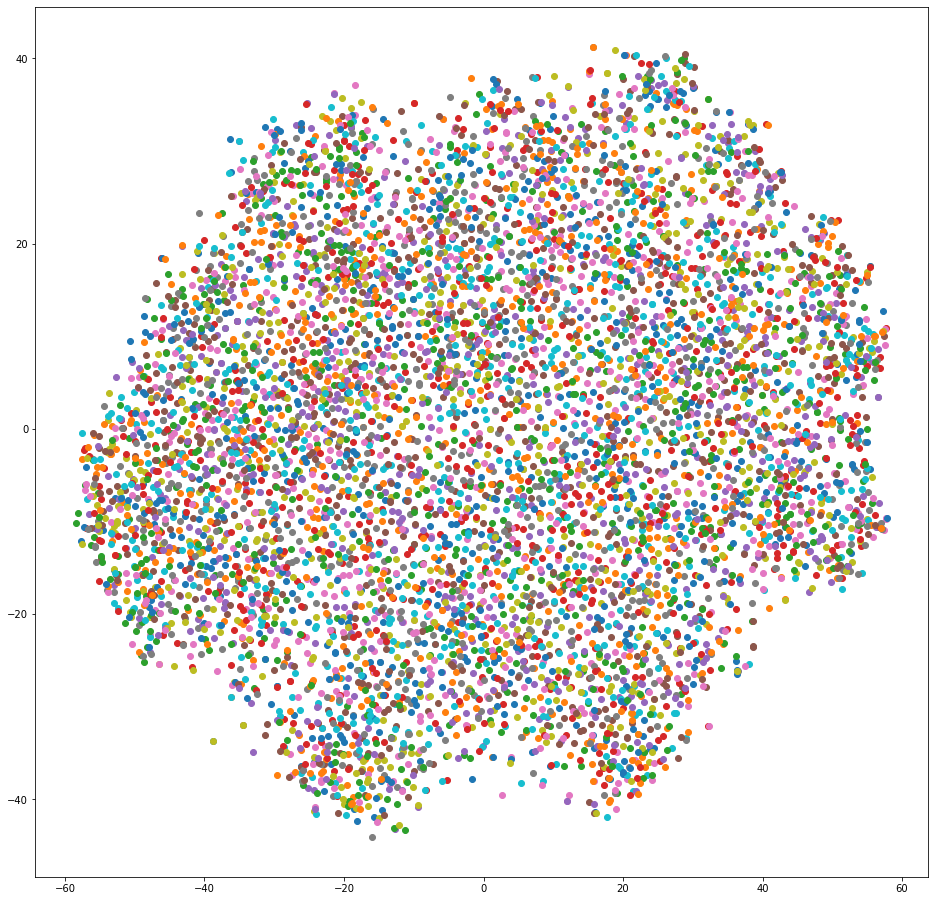

In [ ]:
plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate('',
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
plt.show()

## Stacked Embeddings

In [ ]:
from flair.embeddings import  FlairEmbeddings

# init Flair forward and backwards embeddings
flair_embedding_forward = FlairEmbeddings('news-forward')
flair_embedding_backward = FlairEmbeddings('news-backward')

2021-12-26 11:44:05,908 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/news-forward-0.4.1.pt not found in cache, downloading to /tmp/tmpkzg_dyx8


100%|██████████| 73034624/73034624 [00:02<00:00, 35740769.26B/s]

2021-12-26 11:44:08,024 copying /tmp/tmpkzg_dyx8 to cache at /root/.flair/embeddings/news-forward-0.4.1.pt


2021-12-26 11:44:08,213 removing temp file /tmp/tmpkzg_dyx8
2021-12-26 11:44:08,493 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/news-backward-0.4.1.pt not found in cache, downloading to /tmp/tmp3l6ql1nc


100%|██████████| 73034575/73034575 [00:01<00:00, 37608712.95B/s]

2021-12-26 11:44:10,512 copying /tmp/tmp3l6ql1nc to cache at /root/.flair/embeddings/news-backward-0.4.1.pt


2021-12-26 11:44:10,717 removing temp file /tmp/tmp3l6ql1nc


In [ ]:
from flair.embeddings import StackedEmbeddings

# create a StackedEmbedding object that combines glove and forward/backward flair embeddings
stacked_embeddings = StackedEmbeddings([
                                        glove_embedding,
                                        flair_embedding_forward,
                                        flair_embedding_backward,
                                       ])

In [ ]:
def get_stackedsentence_emb(text):
  sentence = Sentence(text)
  stacked_embeddings.embed(sentence)
  return sentence.embedding


# now check out the embedded tokens.
#for token in sentence:
#    print(token)
#    print(token.embedding)

In [ ]:
df['title_emb_stacked'] = df['title'].apply(lambda x: get_stackedsentence_emb(x))

In [ ]:
from sklearn.manifold import TSNE
%matplotlib inline
def plot_embeddings(df_name,label_name,emb_col_name,total_points):

	all_users = []
	all_users_emb = []
	for index, row in df_name.iterrows():
		 #print(row["author"], row["title_emb"])
		 all_users.append(row[label_name])
		 all_users_emb.append(row[emb_col_name].numpy())
		 

	tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
	new_values = tsne_model.fit_transform(all_users_emb)

	x = []
	y = []
	for value in new_values:
		x.append(value[0])
		y.append(value[1])
			
	plt.figure(figsize=(16, 16)) 
	for i in range(len(x[0:total_points])):
		plt.scatter(x[i],y[i])
		plt.annotate(all_users[i],
						 xy=(x[i], y[i]),
						 xytext=(5, 2),
						 textcoords='offset points',
						 ha='right',
						 va='bottom')
	plt.show()

In [ ]:
plot_embeddings(df,"author","title_emb_stacked",100)

In [ ]:
plot_embeddings(df[df['score'] > 250],"author","title_emb_stacked",len(df[df['score'] > 250]))